In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 读取Excel数据
fileful_path = r"C:\Users\lenovo\Desktop\材料数据挖掘利用方法-机器学习与数据挖掘\01ForVisual.xlsx"
data = pd.read_excel(fileful_path)
df = data.loc[:, ['ELEMENTS', 'T_AVE', 'RH_AVE', 'TOW', 'PRECIPIT', 'SOLAR', 'ULTRA', 'Cl', 'SO2', 'Vcorr']].copy()
# alloc它接受的是一个数字，代表要选择数据的位置；loc接受标签的索引
# 读取数据特征
df.describe()

,ELEMENTS,T_AVE,RH_AVE,TOW,PRECIPIT,SOLAR,ULTRA,Cl,SO2,Vcorr
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,2.367471,17.961494,77.169540,4661.557471,1631.132184,5476.270115,306.201149,28.830345,3.531782,0.034970
std,1.991431,4.199953,1.908515,454.054777,328.105414,682.028865,38.253821,20.002548,1.160495,0.035349
min,0.030000,14.200000,72.800000,3702.000000,1103.000000,4183.000000,182.000000,2.050000,1.800000,0.000300
25%,1.100000,14.700000,76.000000,4352.000000,1367.000000,5111.000000,286.000000,2.800000,2.430000,0.010025
50%,2.000000,15.300000,77.700000,4670.000000,1558.500000,5229.000000,302.000000,32.715000,3.315000,0.021911
75%,2.390000,23.800000,78.500000,5093.000000,1899.000000,5744.000000,341.000000,47.900000,4.400000,0.047425
max,9.200000,24.000000,79.700000,5370.000000,2321.000000,6619.000000,373.000000,55.400000,6.100000,0.199500


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_norm = sc.fit_transform(df)

# 划分训练、测试数据集
from sklearn.model_selection import train_test_split
TrainData, TestData = train_test_split(df_norm, test_size=0.2)

# 划分输入和输出数据集
mater_train = TrainData[:, 0:9].copy()
corr_train = TrainData[:, 9].copy()
mater_test = TestData[:, 0:9].copy()
corr_test = TestData[:, 9].copy()

In [11]:
from sklearn.linear_model import Ridge
# 这里的alpha指的是正则化项参数，初始先设置为1。
rd = Ridge(alpha=1)
rd.fit(mater_train, corr_train)
print(rd.coef_)
print(rd.intercept_)



[-0.22282692 -0.03173224  0.01792911  0.12107564 -0.14069146  0.02048329
  0.15005068  0.20016452 -0.03833049]
0.028352606175460787


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


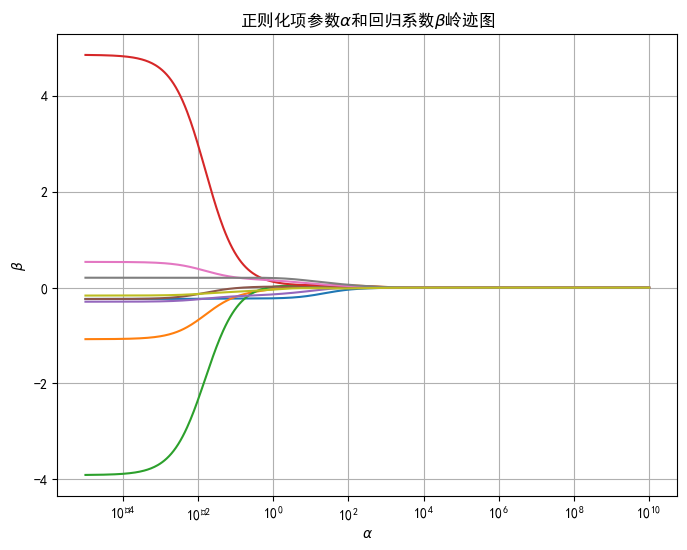

In [23]:
from sklearn.linear_model import Ridge  # 确保导入Ridge

# 设置中文字体（使用Windows系统默认字体）
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]  # 优先使用黑体，其次微软雅黑
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 设置参数以及训练模型
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    rd = Ridge(alpha=alpha)
    rd.fit(mater_train, corr_train)
    betas.append(rd.coef_)

# 绘制岭迹图
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
# 对数据进行对数转换，便于观察。
plt.xscale('log')
# 添加网格线
plt.grid(True)
# 坐标轴适应数据量
plt.axis('tight')
plt.title(r'正则化项参数$\alpha$和回归系数$\beta$岭迹图')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(mater_train, corr_train)
rd_cv.alpha_

# 最后选出的最佳正则化项参数为0.0006362198492657489，然后用这个参数进行模型训练
rd = Ridge(alpha=0.0006362198492657489)  # , fit_intercept=False
rd.fit(mater_train, corr_train)
print(rd.coef_)
print(rd.intercept_)

[-0.23578702 -1.03556512 -3.75140491  4.66782056 -0.28899902 -0.2274167
  0.52224763  0.20671949 -0.16213955]
0.18879013084873908


In [25]:
# 模型预测
from sklearn import metrics
from math import sqrt

# 分别预测训练数据和测试数据
y_train_pred = rd.predict(mater_train)
y_test_pred = rd.predict(mater_test)

# 分别计算其均方根误差和拟合优度
corr_train_rmse = sqrt(metrics.mean_squared_error(corr_train, y_train_pred))
corr_train_score = rd.score(mater_train, corr_train)
corr_test_rmse = sqrt(metrics.mean_squared_error(corr_test, y_test_pred))
corr_test_score = rd.score(mater_test, corr_test)

print('训练集RMSE: {0}, 评分: {1}'.format(corr_train_rmse, corr_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(corr_test_rmse, corr_test_score))

# 为进行反归一化，将输入和输出数据合并
INVERSE_TrainData = np.column_stack((mater_train, y_train_pred))
Inversed_TrainData = sc.inverse_transform(INVERSE_TrainData)
corr_train_fit = Inversed_TrainData[:, 9].copy()
TrainData_unnorm = sc.inverse_transform(TrainData)  # 前面是先做的归一化再做的拆分
corr_train_mea = TrainData_unnorm[:, 9].copy()

训练集RMSE: 0.12252892094734234, 评分: 0.5086747542874319
测试集RMSE: 0.14274427291305378, 评分: 0.41174258251794027


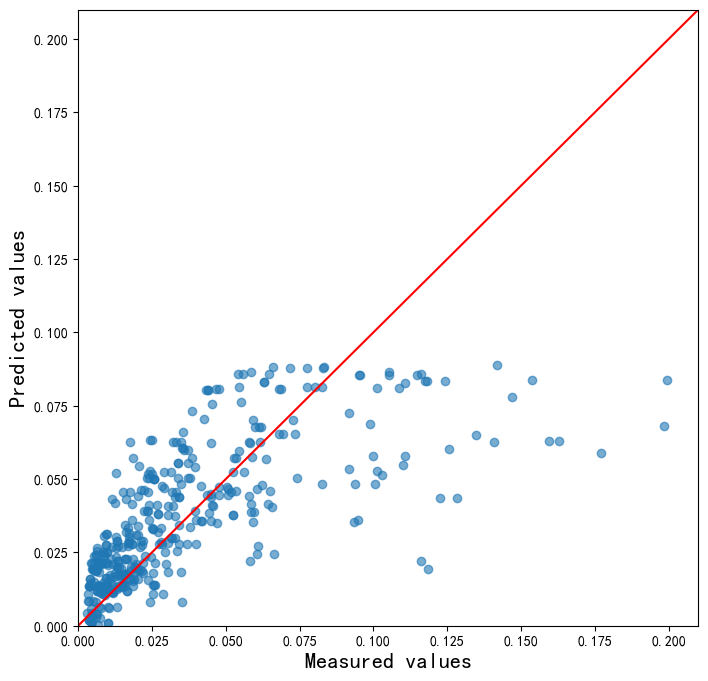

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(corr_train_mea, corr_train_fit, alpha=0.6)
plt.plot([0, 0.21], [0, 0.21], "r-")
plt.xlabel('Measured values', fontsize=16)
plt.ylabel('Predicted values', fontsize=16)
plt.xlim(0, 0.21)
plt.ylim(0, 0.21)
plt.show()

In [1]:
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 读取Excel数据
fileful_path = r"C:\Users\lenovo\Desktop\材料数据挖掘利用方法-机器学习与数据挖掘\01ForVisual.xlsx"
df = pd.read_excel(fileful_path)
df.columns

Index(['ELEMENTS', 'T_MAX', 'T_MIN', 'T_AVE', 'RH_MIN', 'RH_AVE', 'SUN', 'TOW',
       'PRECIPIT', 'WIND_MAX', 'WIND_AVE', 'SOLAR', 'ULTRA', 'Cl', 'SO2',
       'Year', 'Vcorr'],
      dtype='object')

In [2]:
df2 = df.loc[:, ['ELEMENTS', 'T_MAX', 'T_MIN', 'T_AVE', 'RH_MIN', 'RH_AVE', 'SUN', 'TOW',
       'PRECIPIT', 'WIND_MAX', 'WIND_AVE', 'SOLAR', 'ULTRA', 'Cl', 'SO2',
       'Year', 'Vcorr']]
df2.shape

(522, 17)

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_norm = sc.fit_transform(df2)
dfs = pd.DataFrame(df_norm)
# 归一化后矩阵变成np.array格式，不能做.corr()，所以要转换成dataframe
dfs.columns = ['ELEMENTS', 'T_MAX', 'T_MIN', 'T_AVE', 'RH_MIN', 'RH_AVE', 'SUN', 'TOW',
       'PRECIPIT', 'WIND_MAX', 'WIND_AVE', 'SOLAR', 'ULTRA', 'Cl', 'SO2',
       'Year', 'Vcorr']
# 转换后的dataframe列名称都丢了，重新赋值，否则图里的特征名称都是0.1.2这样
X1 = dfs.iloc[:, 0:15].copy()
y1 = dfs.iloc[:, 15].copy()

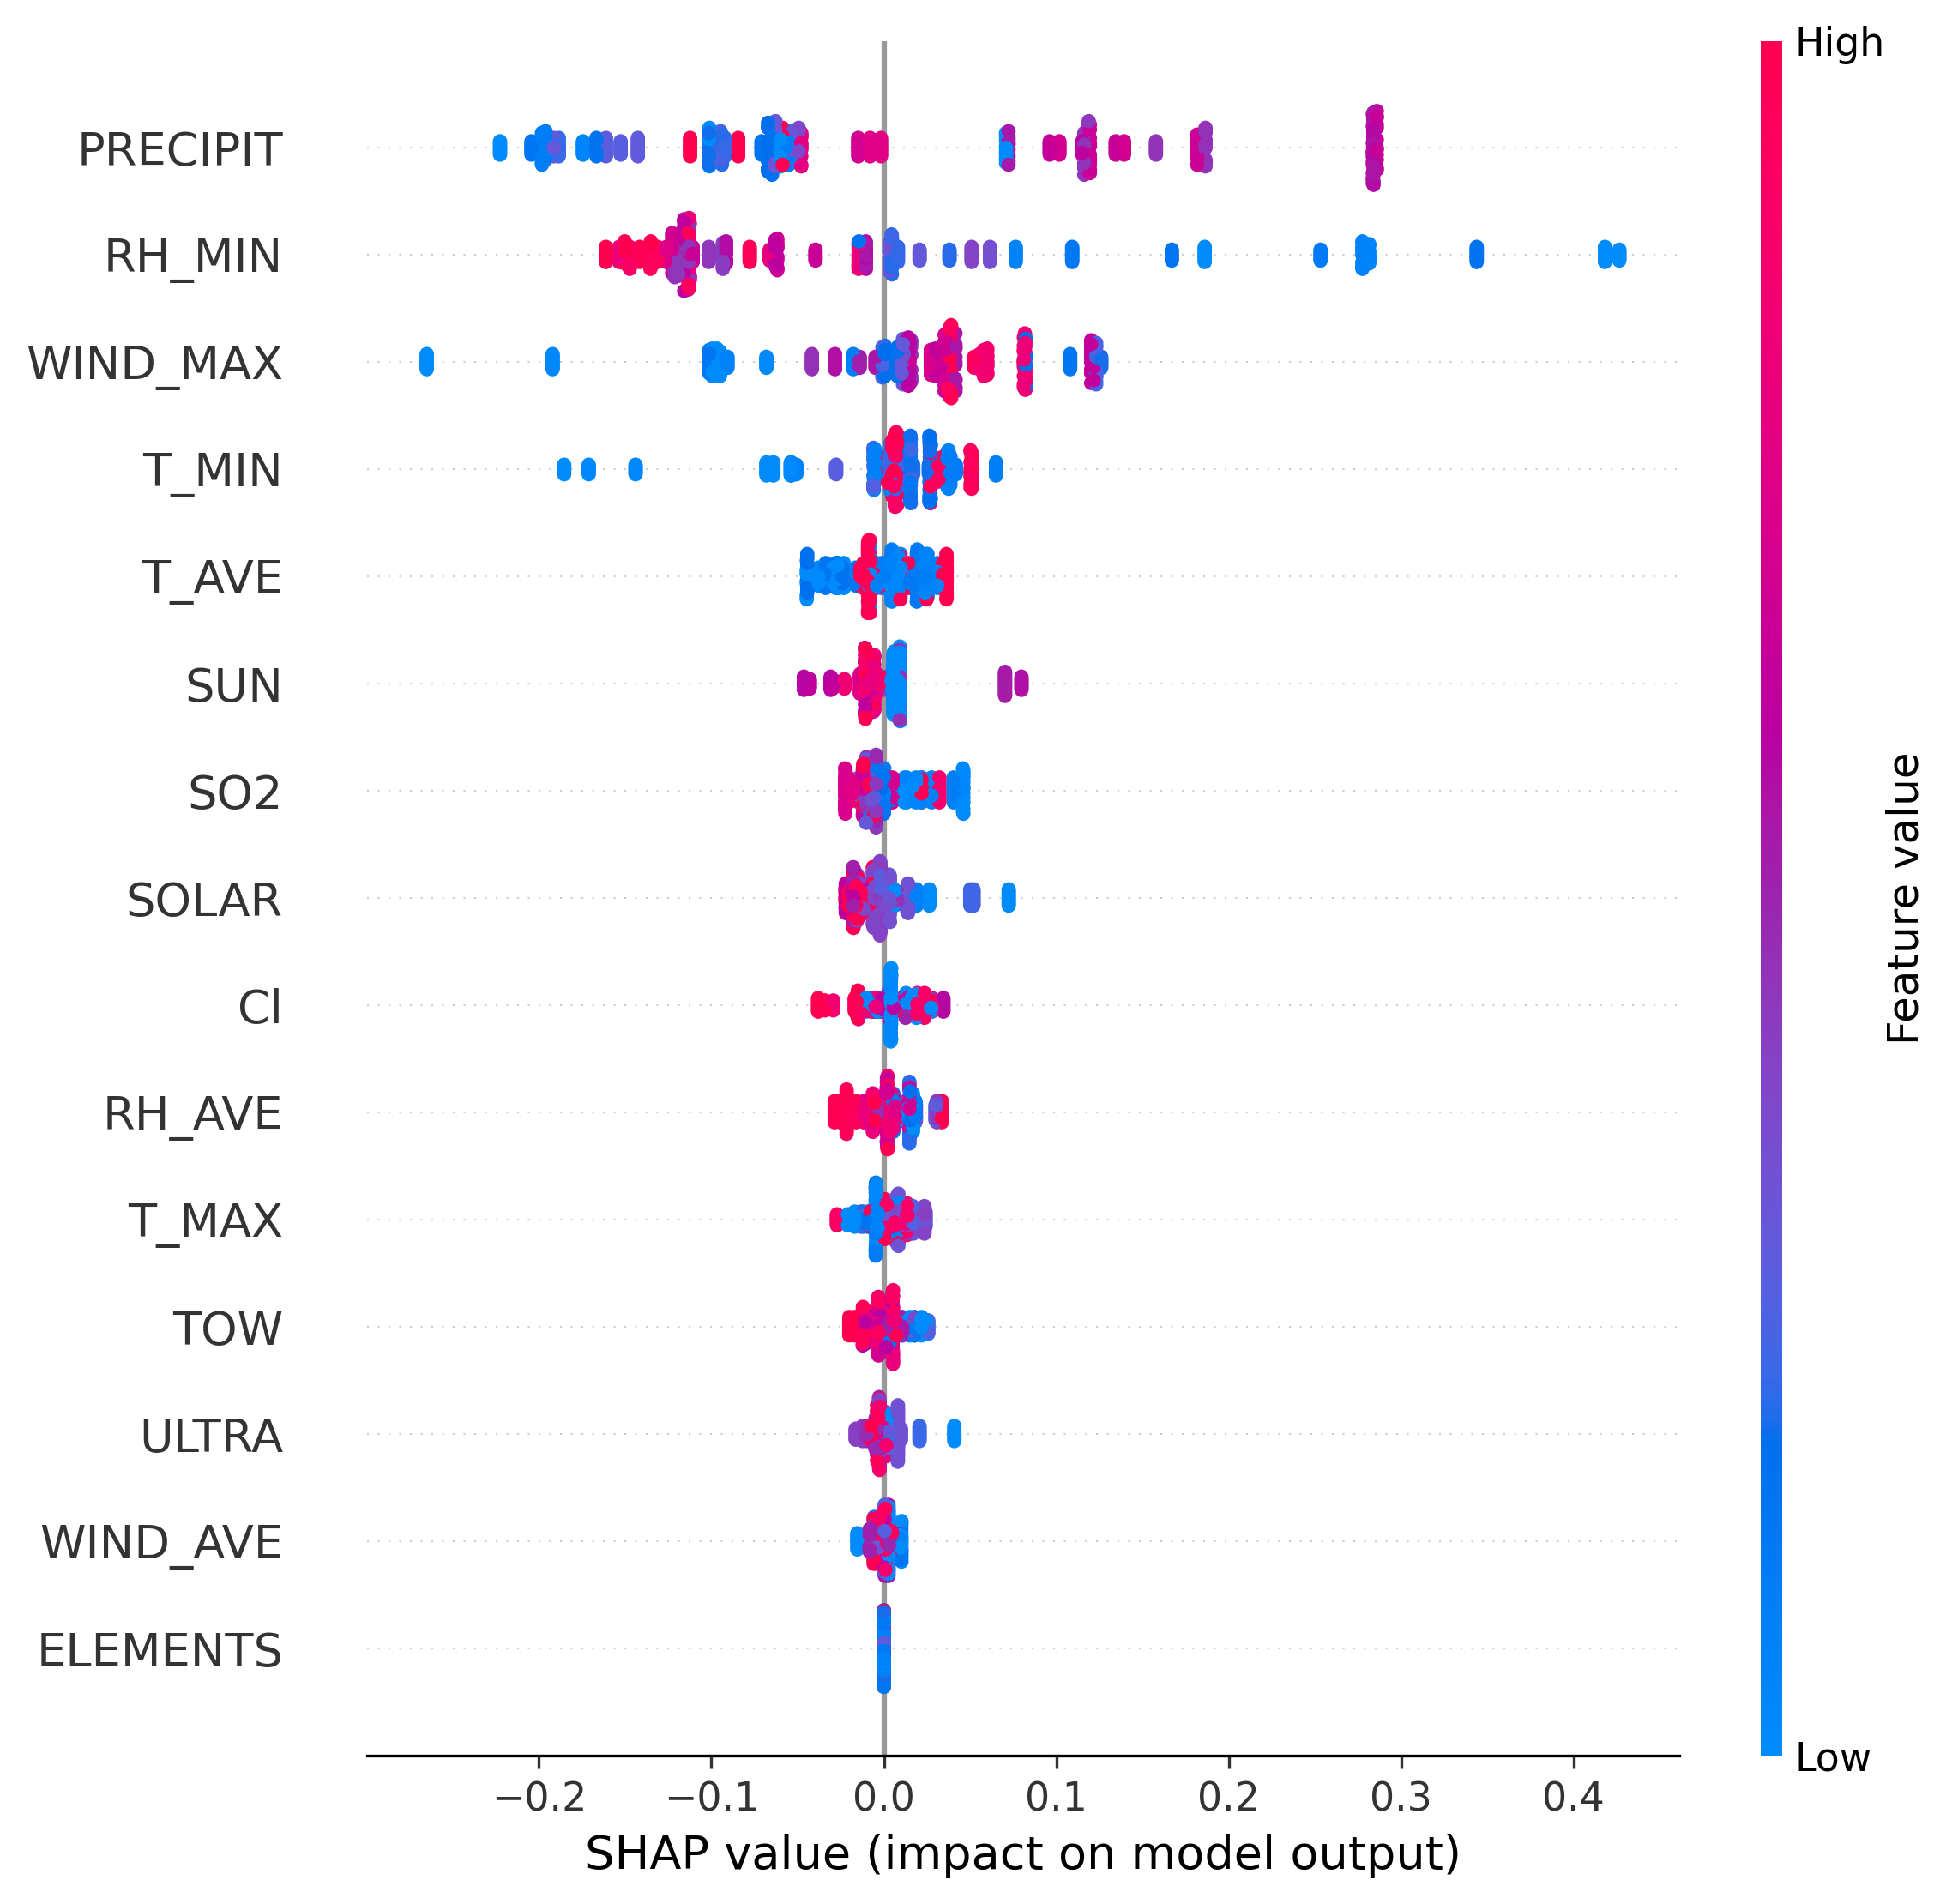

In [4]:
import shap
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor(random_state=0).fit(X1, y1)
explainer = shap.TreeExplainer(RFmodel)
shap_values = explainer.shap_values(X1)
plt.figure(dpi=300)
shap.summary_plot(shap_values, X1, max_display=30)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Reshape, Conv2DTranspose, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

# 初始化参数
latent_dim = 100  # 噪声向量维度
img_shape = (28, 28, 1)  # MNIST图像尺寸 (28x28, 单通道)
epochs = 20000  # 训练轮次
batch_size = 16  # 批次大小
sample_interval = 500  # 每1000轮保存一次生成的图像

In [2]:
# 构建判别器（区分真假图像）
def build_discriminator():
    model = Sequential(name="Discriminator")
    # 输入: (28, 28, 1), 输出: (14, 14, 64)
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same", input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))  # 防止梯度消失
    # 输出: (7, 7, 128)
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    # 展开: 7*7*128 = 6272
    model.add(Reshape((-1, )))
    # 全连接层: 输出1个概率值 (0=假, 1=真)
    model.add(Dense(1, activation="sigmoid"))
    # 编译判别器
    model.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])
    return model

In [3]:
# 构建生成器（从噪声生成假图像）
def build_generator():
    model = Sequential(name="Generator")
    # 输入：噪声向量(100)，输出：(7*7*128, ) = 6272
    model.add(Dense(7 * 7 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    # reshape为(7,7,128)
    model.add(Reshape((7, 7, 128)))
    # 转置卷积：输出(14,14,64)
    model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    # 转置卷积：输出(28,28,1)（最终图像尺寸）
    model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding="same", activation="tanh"))
    return model

In [4]:
# 构建GAN（组合生成器+判别器）
def build_gan(generator, discriminator):
    # 训练生成器时，冻结判别器（不更新判别器参数）
    discriminator.trainable = False

    # GAN输入：噪声向量
    noise_input = Input(shape=(latent_dim,))
    # GAN输出：生成器生成的假图像，经过判别器的预测
    fake_img = generator(noise_input)
    gan_output = discriminator(fake_img)

    # 编译GAN（只训练生成器）
    model = Model(noise_input, gan_output, name="GAN")
    model.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))
    return model

# 加载数据并预处理
(x_train, _), (_, _) = mnist.load_data()
# 归一化：把像素值从[0,255]转成[-1,1]（适配生成器的tanh激活）
x_train = x_train / 127.5 - 1.0
# 增加通道维度：(60000,28,28) ~ (60000,28,28,1)
x_train = np.expand_dims(x_train, axis=-1)
# 生成真实标签（1）和假标签（0）
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))

In [ ]:
# 初始化模型并训练
discriminator = build_discriminator()
generator = build_generator()
gan = build_gan(generator, discriminator)

# 打印模型结构（可选）
print("判别器结构: ")
discriminator.summary()
print("\n生成器结构: ")
generator.summary()

# 开始训练
for epoch in range(epochs):
    # 步骤1：训练判别器（先训练判别器）
    # 1.1 用真实图像训练判别器
    idx = np.random.randint(0, x_train.shape[0], batch_size)  # 随机选取batch_size个真实图像
    real_imgs = x_train[idx]
    d_loss_real, d_acc_real = discriminator.train_on_batch(real_imgs, real_labels)

    # 1.2 用生成器的假图像训练判别器
    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # 生成随机噪声
    fake_imgs = generator.predict(noise, verbose=0)  # 生成假图像
    d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_imgs, fake_labels)

    # 计算判别器的平均损失和准确率
    d_loss = 0.5 * (d_loss_real + d_loss_fake)
    d_acc = 0.5 * (d_acc_real + d_acc_fake)

    # 步骤2：训练生成器（再训练生成器）
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    # 目标：让判别器把假图像判断为“真”（标签用1）
    g_loss = gan.train_on_batch(noise, real_labels)

    # 步骤3：打印日志+保存图像
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}] | D_loss: {d_loss:.4f} | D_acc: {d_acc:.4f} | G_loss: {g_loss:.4f}")

    # 每sample_interval轮，保存生成的图像
    if epoch % sample_interval == 0:
        # 生成25张假图像（5x5网格）
        sample_noise = np.random.normal(0, 1, (25, latent_dim))
        sample_imgs = generator.predict(sample_noise, verbose=0)
        # 反归一化：从[-1,1]转回[0,1]（方便显示）
        sample_imgs = 0.5 * sample_imgs + 0.5

        # 绘制图像
        fig, axs = plt.subplots(5, 5, figsize=(10, 10))
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i, j].imshow(sample_imgs[cnt, :, :, 0], cmap="gray")
                axs[i, j].axis("off")  # 隐藏坐标轴
                cnt += 1

        # 保存图像（可自行修改路径）
        fig.savefig(f"gan_mnist_epoch_{epoch}.png")
        plt.close()

print("训练完成！生成的图像已保存为 gan_mnist_epoch_xxx.png")

判别器结构: 
Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 reshape (Reshape)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 1)                 6273      
                                                                 
Total params: 80,769
Trainable params: 0
Non-